# Lab 3: Clustering and Manifold Learning

### A. Import Python Modules and Dataset

In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [489]:
# Load the dataset
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


### B. Scatterplot Function

In [490]:
colors = np.array(['orange', 'blue', 'lime', 'yellow', 'khaki', 'pink', 'green', 'salmon','cyan'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

## Task 2

### C. K-Means Clustering

In [491]:
k = 5

#Run k-means
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### D. Apply a manifold-learning technique to prohect the data set to a 2D space

In [492]:
# appending cluster centres to dataset
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### D1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [493]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


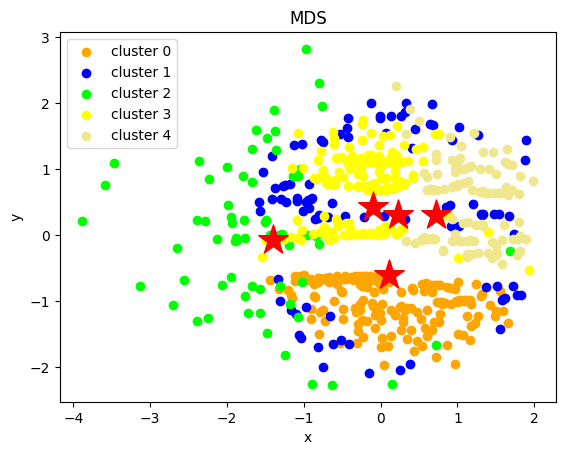

In [494]:
# Plot transformed examples and centres
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### D2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [495]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


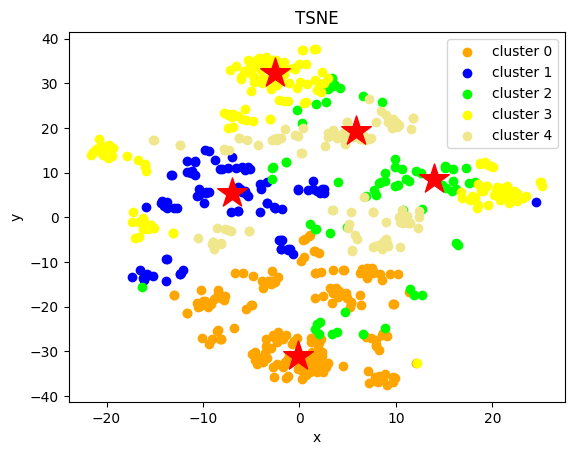

In [496]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

In [497]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [498]:
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.082952,1.056390,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,4
1,0.333333,0.924041,1.045549,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,1
2,0.000000,0.681512,0.633249,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,3
3,0.000000,0.606463,1.000974,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,3
4,0.000000,1.100325,1.113997,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,4


In [499]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,0.000000,0.664021,0.673577,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,4
610,1.000000,0.856946,0.392461,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,3
611,0.333333,1.312470,1.565057,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,3
612,0.666667,1.266308,1.324336,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,3
613,0.000000,0.924041,1.072433,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,1


#### Compute the mean value of each attribute for each cluster

In [500]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.237077,0.823662,1.034218,0.718984,0.983957,0.759358,0.010695,0.657754,0.010695,0.122995,0.042781,0.213904,1.000000,0.000000,0.877005,0.774262
1,0.271739,0.785397,1.017788,0.711141,0.228261,0.815217,0.043478,0.760870,0.000000,0.086957,0.021739,0.358696,0.260870,0.239130,0.010870,0.722210
2,0.368159,1.750744,1.566681,0.703358,0.865672,0.776119,0.074627,0.701493,0.000000,0.343284,0.044776,0.029851,0.328358,0.298507,0.641791,1.721569
3,0.331224,0.808654,1.044989,0.694620,0.993671,0.962025,0.006329,1.000000,0.000000,0.113924,0.069620,0.240506,0.000000,0.632911,0.879747,0.794495
4,0.054545,0.820127,0.932505,0.738636,0.954545,0.618182,0.009091,0.000000,0.009091,0.090909,0.072727,0.190909,0.000000,0.545455,0.681818,0.705304


#### Conclusion
- Cluster 0 has the fewest dependents and the lowest overall income, indicating that these applicants are presumably unmarried and earn less.
- Cluster 1 has the highest applicant income and total income, indicating that these applicants are high earners which means they have a very high chance of loan approval.
- Cluster 4 has a similar income level to cluster 0 and 3 but with a lower credit history. They have a lower chance of loan approval compared to the other clusters.

## Task 3

c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

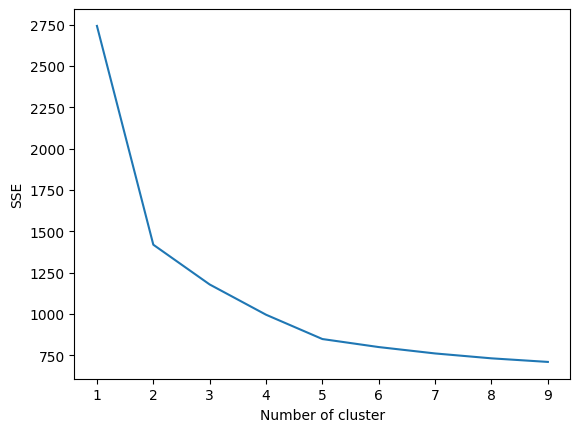

In [501]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    df["clusters"] = kmeans.labels_ 
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

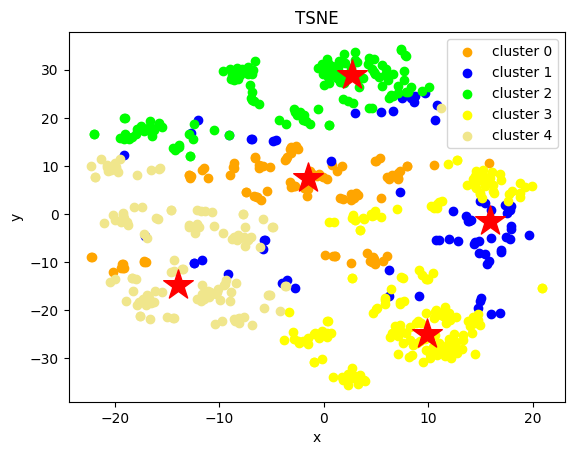

In [502]:
k = 5
 
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers) 

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

## Task 4

c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

For n_clusters = 2 The Silhouette Coefficient is : 0.40237177462516305
For n_clusters = 3 The Silhouette Coefficient is : 0.4273618957289048
For n_clusters = 4 The Silhouette Coefficient is : 0.4403803012085945
For n_clusters = 5 The Silhouette Coefficient is : 0.4708759717119331
For n_clusters = 6 The Silhouette Coefficient is : 0.4499362825714821


c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jot_a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

For n_clusters = 7 The Silhouette Coefficient is : 0.4577011758604622
For n_clusters = 8 The Silhouette Coefficient is : 0.46436006904788807
For n_clusters = 9 The Silhouette Coefficient is : 0.4854186203400872
For n_clusters = 10 The Silhouette Coefficient is : 0.4706321847656271


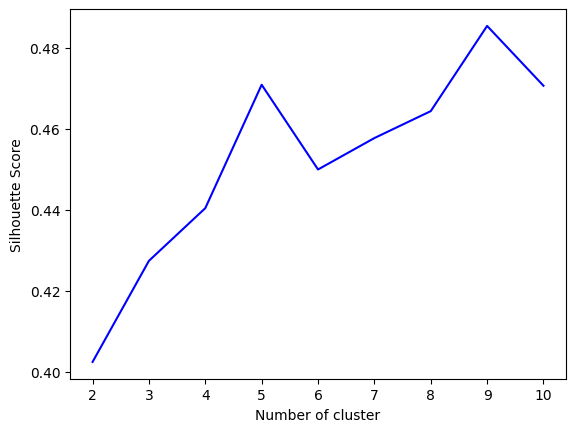

In [503]:
ss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
    ss.append(sil_coeff)
    print("For n_clusters =", k, "The Silhouette Coefficient is :", sil_coeff)

plt.figure()
plt.plot(range(2, 11), ss, 'b-', label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

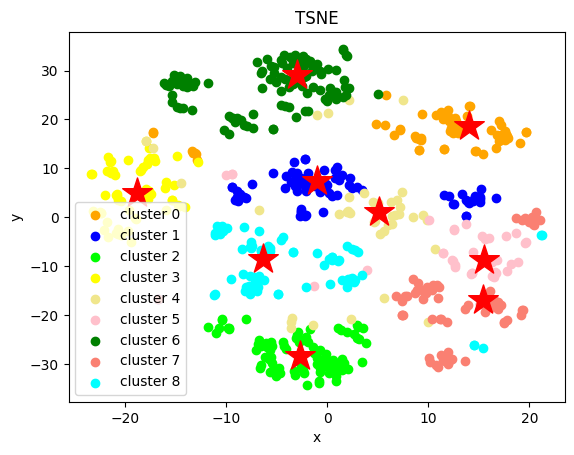

In [504]:
k = 9
 
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)  

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')


#### Comparison
The silhouette approach offers a more objective way to assess the clusters while the elbow method is typically more subjective due to the visual identification of the optimal number of clusters.

## Task 5

In [509]:
# Run a different clustering technique
spectral_cluster = cluster.Birch(n_clusters=k).fit(data)

In [510]:
spectral_data_clusters = np.r_[data,spectral_cluster.subcluster_centers_]

In [511]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


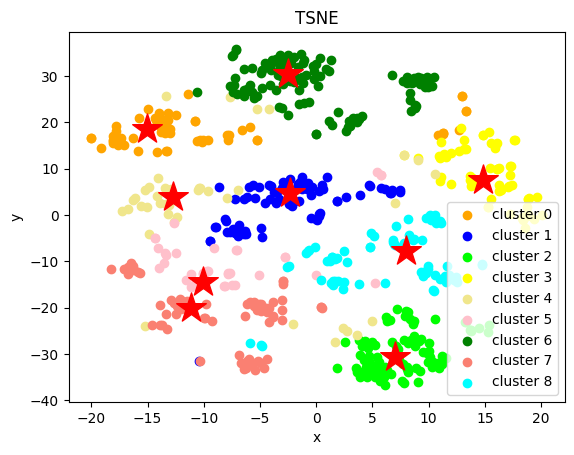

In [512]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')